<a href="https://www.kaggle.com/code/madushaninimeshika/mnist-nueralnetwork?scriptVersionId=215910583" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [13]:
## Imports
import torch
import torchvision ## Contains some utilities for working with the image data
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt
#%matplotlib inline
import torchvision.transforms as transforms
from torch.utils.data import random_split
from torch.utils.data import DataLoader
import torch.nn.functional as F

We will import torchvision which contains some utility functions for working with the image data. It also contain helper classes to automatically download and import the famous datasets like MNIST.

MNIST dataset has 60,000 images which can be used to train the model. There is also an additional test set of 10,000 images which can be created by passing train = False to the MNIST class.

# Loading the MNIST dataset

In [14]:
dataset = MNIST(root='data/', download=True)
print(len(dataset))

60000


In [15]:
dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: data/
    Split: Train

Label :  8


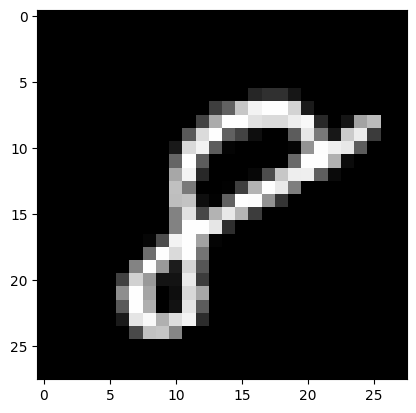

In [16]:
image, label = dataset[59999]
plt.imshow(image, cmap='gray')
print('Label : ', label)

These images are small in size, and recognizing the digits can sometimes be hard. PyTorch doesn't know how to work with images. We need to convert the images into tensors. We can do this by specifying a transform while creating our dataset.

PyTorch datasets allow us to specify one or more transformation function which are applied to the images as they are loaded.

torchvision.transforms contains many such predefined functions and we will use ToTensor transform to convert images into Pytorch tensors.
Loading the MNIST data with transformation applied while loadin

In [17]:
#MNIST Dataset(image and labels)
mnist_dataset = MNIST(root='data/', train=True, transform=transforms.ToTensor())
print(mnist_dataset)

Dataset MNIST
    Number of datapoints: 60000
    Root location: data/
    Split: Train
    StandardTransform
Transform: ToTensor()


In [18]:
image_tensor, label = mnist_dataset[0]
print(image_tensor.shape, label)

torch.Size([1, 28, 28]) 5


The image is now convert to a 28 X 28 tensor.The first dimension is used to keep track of the color channels. Since images in the MNIST dataset are grayscale, there's just one channel. Other datasets have images with color, in that case the color channels would be 3(Red, Green, Blue).


In [19]:
print(image_tensor[:, 10:15, 10: 15])
print(torch.max(image_tensor), torch.min(image_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


The values range from 0 to 1, with 0 representing black, 1 white and the values between different shades of grey. We can also plot the tensor as an image using lt.imshow

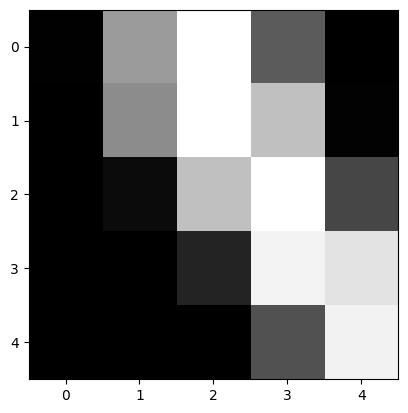

In [20]:
# Plot the image of the tensor
plt.imshow(image_tensor[0, 10:15, 10:15], cmap='gray')

The image is now convert to a 28 X 28 tensor.The first dimension is used to keep track of the color channels. Since images in the MNIST dataset are grayscale, there's just one channel. Other datasets have images with color, in that case the color channels would be 3(Red, Green, Blue).

In [21]:
train_data, validation_data = random_split(mnist_dataset, [50000, 10000])

# Print the length of train & validation dataset
print("Length of Train dataset : ", len(train_data))
print("Length of validation dataset : ", len(validation_data))

Length of Train dataset :  50000
Length of validation dataset :  10000


# Model

These images are small in size, and recognizing the digits can sometimes be hard. PyTorch doesn't know how to work with images. We need to convert the images into tensors. We can do this by specifying a transform while creating our dataset.

PyTorch datasets allow us to specify one or more transformation function which are applied to the images as they are loaded.

torchvision.transforms contains many such predefined functions and we will use ToTensor transform to convert images into Pytorch tensors.

Loading the MNIST data with transformation applied while loading


In [22]:
x = torch.randn(4, 784)
print(x.shape)

torch.Size([4, 784])


# Training loop

In [23]:
import torch
import torch.nn as nn
import torch.optim as optim

class MnistModel(nn.Module):
    def __init__(self, input_dim=28*28, output_dim=10):
        super(MnistModel, self).__init__()
        self.input_dim = input_dim
        self.output_dim = output_dim

        self.network = nn.Sequential(
            nn.Linear(self.input_dim, self.input_dim // 2),
            nn.ReLU(),
            nn.Linear(self.input_dim // 2, self.input_dim // 4),
            nn.ReLU(),
            nn.Linear(self.input_dim // 4, self.input_dim // 8),
            nn.ReLU(),
            nn.Linear(self.input_dim // 8, self.input_dim // 16),
            nn.ReLU(),
            nn.Linear(self.input_dim // 16, self.output_dim),
            nn.Softmax(dim=-1)
        )

    def forward(self, x):
        return self.network(x)

# Hyperparameters
input_dim = 28 * 28
output_dim = 10
batch_size = 128
epochs = 10

# Initialize model, loss function, and optimizer
model = MnistModel(input_dim, output_dim)
criterion = nn.CrossEntropyLoss()  # Suitable for multi-class classification
optimizer = optim.Adam(model.parameters(), lr=1e-5)

# Move model to device (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Training loop

# Data Loaders
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(validation_data, batch_size=batch_size, shuffle=False)

for epoch in range(epochs):
    model.train()  # Set model to train mode
    running_loss = 0.0

    for images, labels in train_loader:
        # Flatten images into vectors of shape (batch_size, input_dim)
        images = images.view(images.size(0), -1).to(device)  # Flatten input
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch [{epoch + 1}/{epochs}], Loss: {running_loss / len(train_loader):.4f}')


Epoch [1/10], Loss: 2.2989
Epoch [2/10], Loss: 2.2273
Epoch [3/10], Loss: 2.0800
Epoch [4/10], Loss: 1.9548
Epoch [5/10], Loss: 1.8853
Epoch [6/10], Loss: 1.8172
Epoch [7/10], Loss: 1.7755
Epoch [8/10], Loss: 1.7449
Epoch [9/10], Loss: 1.7223
Epoch [10/10], Loss: 1.7058


# Evaluate the model
Use the validation dataset toevaluate the model

Compute the metrix like accuracy score

In [25]:
def ModelEvaluation(model, criterion, train_loader):
    model.eval()
    total_loss, total_correct = 0,0
    with torch.no_grad():
        for batch in train_loader:
            images, labels = batch

            # Flatten images
            images = images.view(images.size(0), -1).to(device)
            labels = labels.to(device)
            
            preds = model(images)
            total_loss += criterion(preds, labels).item()
            total_correct = (preds.argmax(1) == labels).sum().item()
    return total_loss/len(train_loader), total_correct/len(train_loader.dataset)

val_loss, val_acc = ModelEvaluation(model, criterion, val_loader)
print(f'Validation loss : {val_loss}, Accuracy : {val_acc}')
                    

Validation loss : 1.7022625057003167, Accuracy : 0.0012
